In [1]:

import pandas as pd
import numpy as np
from collections import Counter
import os.path as osp
import json
import matplotlib.pyplot as plt
import pickle

# Print all variables on their own lines
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_rows', 1000)

# Use latex in mpl
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}' #for \text command

In [2]:
"""First run dataset saving script that saves all per-sample entries in the stream."""

# Excludes unseen actions during pretrain
TRAIN_USERS_MODE=False

if TRAIN_USERS_MODE:
    train_segmented_ckpt = "/home/matthiasdelange/sftp_remote_projects/ContextualOracle_Matthias/results/ego4d_action_recog/summarize_streams/logs/2022-10-07_04-49-02_UIDa5c4c52b-a8d8-4155-b1f4-bed9cd82374e/dataset_entries_train_FEWSHOT=False_ego4d_LTA_train_usersplit_10users.ckpt"
else:
    test_segmented_ckpt = "/home/matthiasdelange/sftp_remote_projects/ContextualOracle_Matthias/results/ego4d_action_recog/summarize_streams/logs/2022-10-07_04-33-34_UIDd679068a-dc6e-40ff-b146-70ffe0671a97/dataset_entries_test_FEWSHOT=False_ego4d_LTA_test_usersplit_40users.ckpt"


FILE_TO_ANALYZE = test_segmented_ckpt


with open(FILE_TO_ANALYZE, 'rb') as f:
    ds = pickle.load(f)

""" Create DF """
def ds_to_user_dfs(ds):
    ret = {}
    for user, user_entries in ds.items():
        # Do all for actions/verbs/nouns
        user_df = pd.json_normalize(user_entries)  # Convert to DF
    
        # Create action column
        def label_fn(x):
            assert len(x) == 2, "Need two columns to merge"
            if not isinstance(x[0],list):
                assert not isinstance(x[1],list)
                return f"{x[0]}-{x[1]}"

            return [f"{l}-{r}" for l,r in zip(x[0],x[1])]

        user_df['action_label'] = user_df.loc[:,('verb_label','noun_label')].apply(label_fn,axis=1)
        ret[user] = user_df
        print("Created action_label column")
    return ret

# MAIN SCRIPT
dfs = ds_to_user_dfs(ds) # Preprocess dataframes

'First run dataset saving script that saves all per-sample entries in the stream.'

' Create DF '

Created action_label column
Created action_label column
Created action_label column
Created action_label column
Created action_label column
Created action_label column
Created action_label column
Created action_label column
Created action_label column
Created action_label column
Created action_label column
Created action_label column
Created action_label column
Created action_label column
Created action_label column
Created action_label column
Created action_label column
Created action_label column
Created action_label column
Created action_label column
Created action_label column
Created action_label column
Created action_label column
Created action_label column
Created action_label column
Created action_label column
Created action_label column
Created action_label column
Created action_label column
Created action_label column
Created action_label column
Created action_label column
Created action_label column
Created action_label column
Created action_label column
Created action_label

In [3]:
import json
pretrain_unsegmented_json = '/fb-agios-acai-efs/mattdl/data/ego4d_lta_usersplits/2022-09-08_17-17-16_ego4d_LTA_usersplit/ego4d_LTA_pretrain_incl_nanusers_usersplit_148users.json'

with open(pretrain_unsegmented_json, 'r') as f:
    action_sets = json.load(f)['user_action_sets']['user_agnostic']

# maps action-idx to {'name':, 'count':} for name of action and frequency count
action_to_name_and_freq_dict = action_sets['action_to_name_dict']

action_to_freq_dict = {a: value_dict['count'] for a, value_dict in action_to_name_and_freq_dict.items()}
action_to_freq_tuples = [(a,cnt) for a,cnt in action_to_freq_dict.items()]
pretrain_action_to_freq_tuples_s = sorted(action_to_freq_tuples,key=lambda x: x[1],reverse=True)
pretrain_action_to_freq_tuples_s

pretrain_actions = [x[0] for x in pretrain_action_to_freq_tuples_s]
pretrain_action_counts = [x[1] for x in pretrain_action_to_freq_tuples_s]

total_pretrain_count = sum(pretrain_action_counts)
pretrain_action_distr = [x/total_pretrain_count for x in pretrain_action_counts]

action_to_plot_idx = {action: idx for idx, action in enumerate(pretrain_actions)}

print(len(pretrain_action_to_freq_tuples_s))

[('65-105', 182),
 ('92-105', 167),
 ('70-469', 146),
 ('65-67', 125),
 ('92-67', 112),
 ('16-312', 108),
 ('65-10', 100),
 ('65-312', 98),
 ('53-452', 94),
 ('65-469', 92),
 ('92-10', 91),
 ('19-279', 90),
 ('65-97', 80),
 ('53-3', 78),
 ('62-407', 77),
 ('65-286', 75),
 ('92-469', 73),
 ('92-286', 71),
 ('65-131', 69),
 ('16-387', 66),
 ('92-97', 65),
 ('69-131', 65),
 ('65-313', 63),
 ('50-150', 62),
 ('65-368', 62),
 ('35-387', 62),
 ('65-40', 61),
 ('16-131', 61),
 ('92-368', 60),
 ('92-339', 59),
 ('92-233', 58),
 ('92-40', 58),
 ('65-225', 58),
 ('92-313', 56),
 ('0-469', 55),
 ('65-233', 54),
 ('92-225', 54),
 ('65-41', 54),
 ('92-389', 53),
 ('16-190', 52),
 ('65-389', 51),
 ('65-390', 50),
 ('65-387', 50),
 ('92-390', 49),
 ('62-10', 49),
 ('50-59', 46),
 ('49-76', 46),
 ('11-150', 45),
 ('50-134', 45),
 ('92-312', 44),
 ('50-105', 43),
 ('49-105', 42),
 ('50-129', 41),
 ('108-389', 41),
 ('92-41', 41),
 ('1-264', 40),
 ('19-50', 40),
 ('49-10', 39),
 ('100-150', 39),
 ('77-9

2740


" Plot average histogram over user's actions/verbs/nouns."

Plotting
Idx 0: User 10
Idx 1: User 105
Idx 2: User 11
Idx 3: User 116
Idx 4: User 120
Idx 5: User 123
Idx 6: User 126
Idx 7: User 16
Idx 8: User 17
Idx 9: User 19
Idx 10: User 20
Idx 11: User 21
Idx 12: User 22
Idx 13: User 23
Idx 14: User 25
Idx 15: User 262
Idx 16: User 278
Idx 17: User 28
Idx 18: User 283
Idx 19: User 31
Idx 20: User 33
Idx 21: User 331
Idx 22: User 346
Idx 23: User 35
Idx 24: User 359
Idx 25: User 37
Idx 26: User 378
Idx 27: User 38
Idx 28: User 39
Idx 29: User 431
Idx 30: User 436
Idx 31: User 44
Idx 32: User 45
Idx 33: User 452
Idx 34: User 453
Idx 35: User 51
Idx 36: User 55
Idx 37: User 59
Idx 38: User 74
Idx 39: User 97
Finishing up plotting
Saved plot: ../imgs/pretrain_vs_user_histogram/2022-10-26_16-19-06_PRETRAIN_VS_USER_LABEL_HISTOGRAM_TEST/PRETRAIN_VS_USER_LABEL_HISTOGRAM_TEST_action (high to low population frequency).pdf


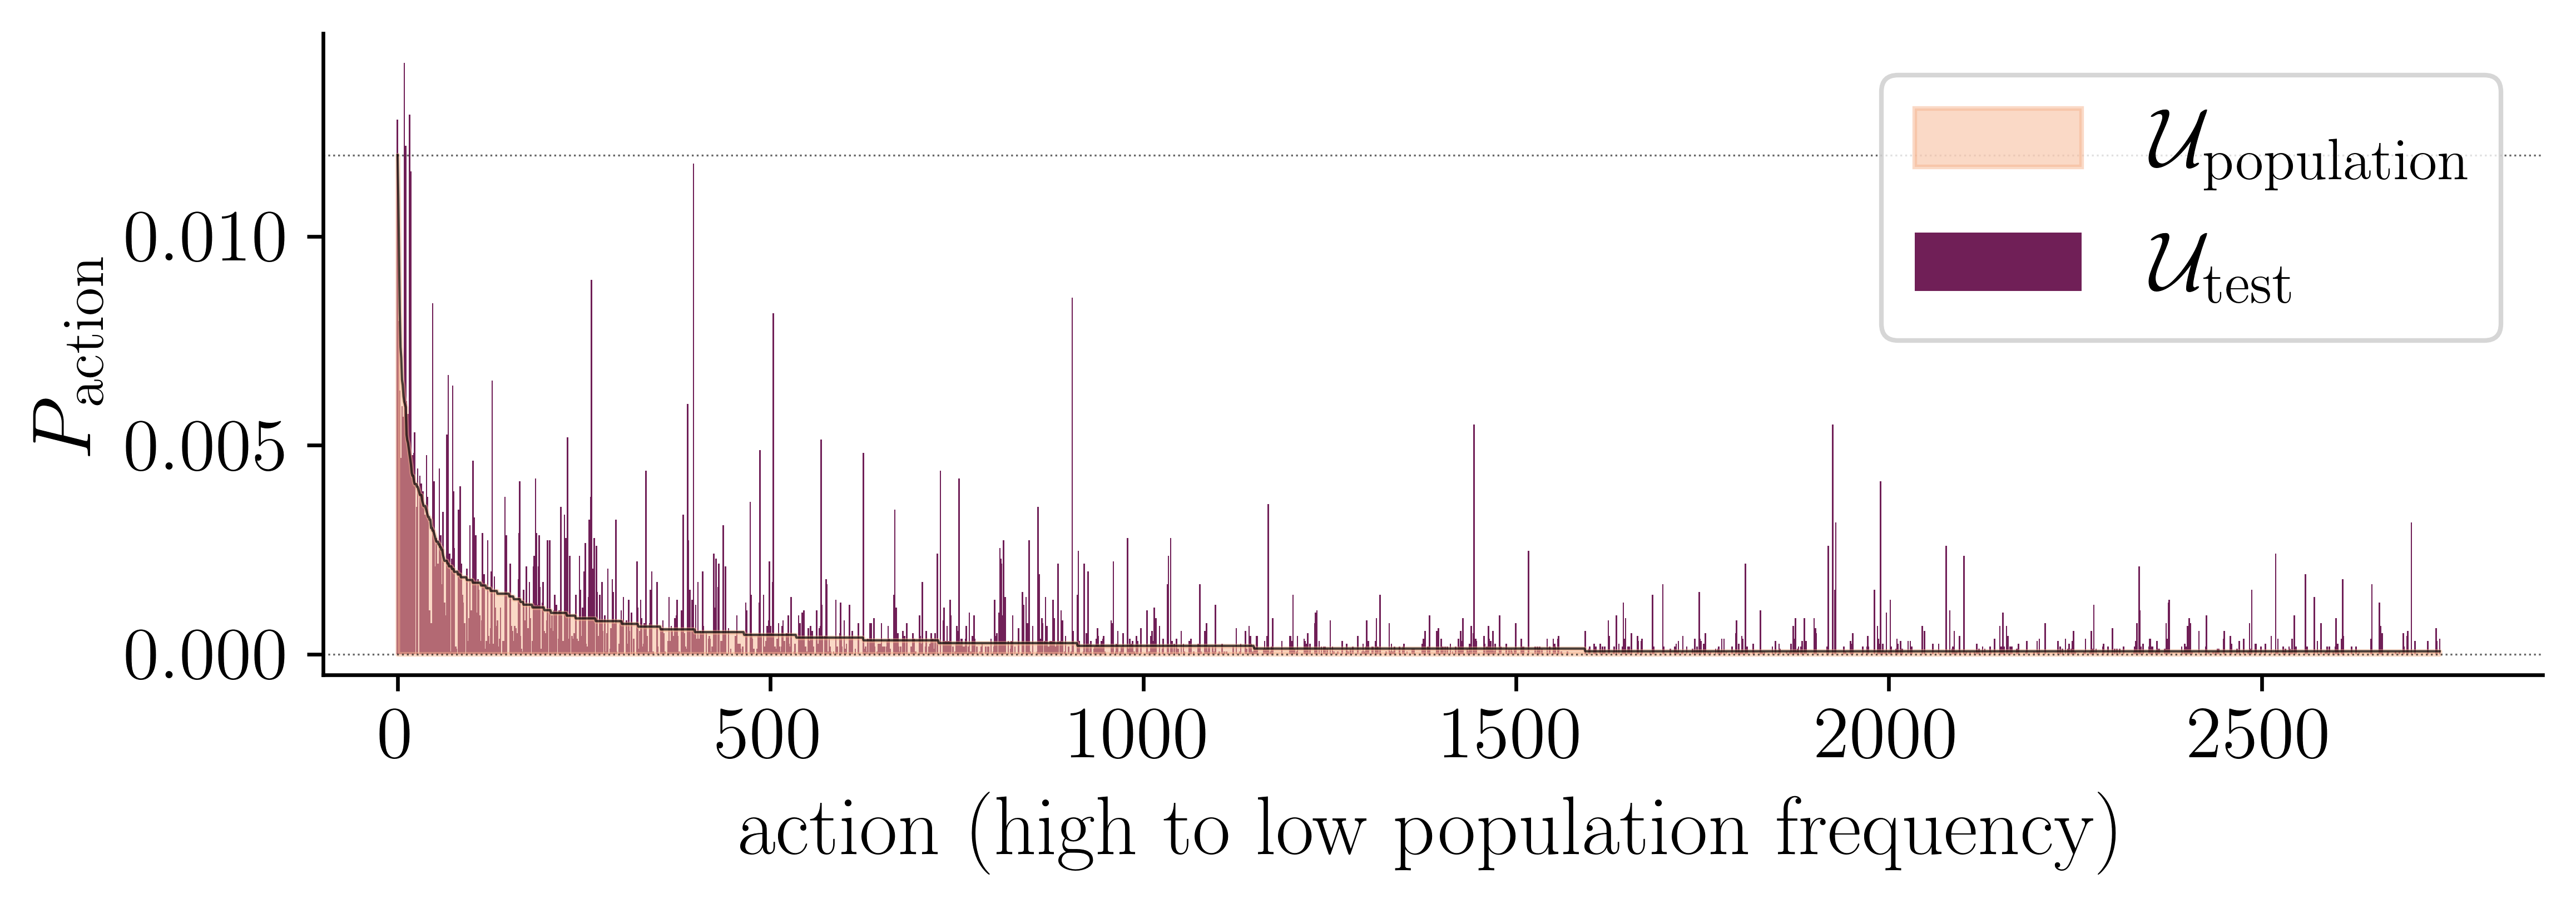

<Figure size 432x288 with 0 Axes>

In [12]:
import seaborn as sns
import datetime
import os

main_outdir = "../imgs/pretrain_vs_user_histogram"
title = f"PRETRAIN_VS_USER_LABEL_HISTOGRAM_{'TRAIN' if TRAIN_USERS_MODE else 'TEST'}"
parent_dirname = datetime.datetime.now().strftime('%Y-%m-%d_%H-%M-%S') + "_" + title
parent_dirpath = os.path.join(main_outdir, parent_dirname)
os.makedirs(parent_dirpath, exist_ok=True)

user_set = 'train' if TRAIN_USERS_MODE else 'test'

# Set fonts
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['font.size'] = 16



# Set latex font in mpl
# plt.rcParams['mathtext.fontset'] = 'custom'
# plt.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
# plt.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
# plt.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'


# MPL CONFIG
fontsize = 16
params = {'font.family':'DeJavu Serif','font.serif':'Times New Roman',
          'axes.labelsize': fontsize+2,'axes.titlesize':fontsize, 'font.size': fontsize, 'legend.fontsize': fontsize, 'xtick.labelsize': fontsize, 'ytick.labelsize': fontsize}
plt.rcParams.update(params)

figsize = (6,4)
figsize = (8,3)
xlim=(-100,None)
ylim=(-0.0005,None)
ylabel = r"$P_{\text{action}}$"
# LINE CONFIG

# line_colors = 
shade_color = sns.color_palette("flare", 10)[0]
bar_color = sns.color_palette("flare", 10)[8]

shade_color = sns.color_palette("rocket")[5]
bar_color = sns.color_palette("rocket")[1]

if TRAIN_USERS_MODE:
    line_alpha=1
else:
    line_alpha=1


# BARCHART CONFIG
plot_yerror = None 
legend_label = None
bar_align='center'
log=False
legend_labels=None
grid = False
bar_alpha = 0.1
bar_marker_offset=0


""" Plot average histogram over user's actions/verbs/nouns."""
def plot_user_histogram_lines_and_avg_bars(dfs, label_col_name):
    """"""
    print(f"Plotting")
    plot_x_vals = list(range(len(pretrain_actions)))
    

    # Per-user plots: Stacked barchart
    nb_users = len(dfs)
    fig, ax = plt.subplots(figsize=figsize, dpi=600)
    

    
    
    if 'action' in label_col_name:
        bar_width=2
        xlabel='action (high to low population frequency)'
        
    elif 'verb' in label_col_name:
        bar_width=0.8
        xlabel='verb (high to low frequency)'

    elif 'noun' in label_col_name:
        bar_width=0.8
        xlabel='noun (high to low frequency)'

    else:
        raise ValueError()
    
    # Create per user a plot-entry
    user_avg_dict_list = []
    
    # TODO: Calculate normalized histogram per user, then avg over users
    
    # Iterate users, get per-users histogram and plot line
    all_user_distributions = []
    for user_idx, (user_id, user_df) in enumerate(dfs.items()):
        print(f"Idx {user_idx}: User {user_id}")
        cnt = Counter(user_df[label_col_name].tolist())

        user_action_and_count_sorted = sorted([(k,v) for k,v in cnt.items() ] ,key=lambda x: x[1], reverse=True)
        user_actions_sorted = [x[0] for x in user_action_and_count_sorted] # Action/verb/noun ids
        user_action_counts_sorted = [x[1] for x in user_action_and_count_sorted] # Frequencies (counts)
        
        user_plot_y_values =[0]* len(pretrain_actions)
        # Iterate pretrain distribution for ordering of actions
        # Fill in count if present, otherwise 0, asserting all are in pretrain!
        
        for action,action_count in user_action_and_count_sorted:
            plot_idx = action_to_plot_idx[action]
            user_plot_y_values[plot_idx] = action_count
        
#         # Normalize to distribution
#         total_vals = sum(user_plot_y_values)
#         p_user_plot_y_values = [val/total_vals for val in user_plot_y_values]
    
        p_user_plot_y_values = user_plot_y_values
        
        all_user_distributions.append(p_user_plot_y_values)
        
        # Plot bars
#         color = line_colors[user_idx % len(line_colors)]

        

    # Get mean dsitr
#     all_user_distributions_np = np.asarray(all_user_distributions)
#     max_val = all_user_distributions_np.max()
#     user_avg_distr_vals = all_user_distributions_np.mean(axis=0)
    
    # Sum and normalize
    all_user_distributions_np = np.asarray(all_user_distributions)
    sum_user_distributions_np = all_user_distributions_np.sum(axis=0)
    sum_user_distributions_np = sum_user_distributions_np / sum(sum_user_distributions_np) # Make distr
    user_avg_distr_vals = sum_user_distributions_np
    
    total_vals = sum(user_plot_y_values)
    p_user_plot_y_values = [val/total_vals for val in user_plot_y_values]
    
    # Rescale to match max of pretrain distribution
#     rescale_factor = max(pretrain_action_distr)/max(user_avg_distr_vals)
#     user_avg_distr_vals_rescaled = [rescale_factor*user_avg_distr_val for user_avg_distr_val in user_avg_distr_vals]
    user_avg_distr_vals_rescaled = user_avg_distr_vals
    
    # Plot avg distr
    ax.bar(plot_x_vals, user_avg_distr_vals_rescaled, bar_width,
       alpha=line_alpha,color=bar_color,edgecolor = "none",
           label=rf"$\mathcal{{U}}_{{\text{{{user_set}}}}}$",
#                label='Women'
      )
    
    plt.fill_between(plot_x_vals, pretrain_action_distr, alpha=0.5, color=shade_color,linewidth=1,
#                      label=r"$P_{\text{label}}$",
             label=r"$\mathcal{U}_\text{population}$",
                     
                    )
    plt.plot(plot_x_vals, pretrain_action_distr, alpha=0.7, color='black',linewidth=0.5,
#                      label=r"$P_{\text{label}}$",
                    )
    
    # Plot pretrain
    # Rescale to match max of user_distrs
#     pretrain_action_distr =
    

    
    print(f"Finishing up plotting")
    plt.axhline(y=max(pretrain_action_distr), color='black', linestyle=':',alpha=0.6,linewidth=0.4)
    plt.axhline(y=0, color='black', linestyle=':',alpha=0.6,linewidth=0.4)

    # Hide the right and top spines
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    
    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    
#     ax.set_facecolor('0.97')

    plt.ylim(*ylim)
    plt.xlim(*xlim)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
#     print(title)
#     plt.title(title)
    plt.grid(grid, which='both')
    fig.tight_layout() 

    plt.legend(prop={'size': 18})
    
    # Save
    if parent_dirpath is not None:
        filename = f"{title}_{xlabel}.pdf"
        filepath = os.path.join(parent_dirpath,filename)
        fig.savefig(filepath, bbox_inches='tight')
        print(f"Saved plot: {filepath}")

    plt.show()
    plt.clf()
    

# TODO: Subset DFS for visibility:
# dfs = {'105':dfs['105']}

# Grids of histograms
for action_mode in  ['action_label']: # 'verb_label','noun_label',
    plot_user_histogram_lines_and_avg_bars(dfs, action_mode)